<a href="https://colab.research.google.com/github/ParsaFotowat/ML_Projects/blob/main/Dogs_Breed_Predicition(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dogs Breed Classification with Supervised Machine Learning**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parsafotowat","key":"56ccfe2bcb31ace1dcbc12f1563e17a5"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!mkdir dogs_Dataset
%cd dogs_Dataset

/content/dogs_Dataset


In [6]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           6393          8  0.1764706        


In [7]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
 99% 682M/691M [00:07<00:00, 150MB/s]
100% 691M/691M [00:07<00:00, 96.8MB/s]
/content


In [8]:
!unzip dogs_Dataset/dogbreedidfromcomp.zip -d dogs_Dataset
!rm dogs_Dataset/dogbreedidfromcomp.zip
!rm -rf dogs_Dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dogs_Dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dogs_Dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dogs_Dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dogs_Dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dogs_Dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dogs_Dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dogs_Dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dogs_Dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dogs_Dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dogs_Dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dogs_Dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dogs_Dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dogs_Dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dogs_Dataset/

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [10]:
df_labels=pd.read_csv('dogs_Dataset/labels.csv')
print(df_labels.shape)
df_labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
all_breeds= df_labels['breed']
breeds_count= all_breeds.value_counts()
breeds_count.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [12]:
#selecting most common breeds
classes = ['scottish_deerhound','maltese_dog','afghan_hound','entlebucher','bernese_mountain_dog']
labels = df_labels[df_labels['breed'].isin(classes)]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [13]:
X_data = np.zeros((len(labels),224,224,3),dtype='float32')
Y_data = label_binarize(labels['breed'],classes =classes )

In [14]:
# Reading and normalizing The images
for i in tqdm(range(len(labels))):
    img = image.load_img('dogs_Dataset/train/'+labels['id'][i]+'.jpg',target_size=(224,224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x/ 255.0

print('\nTrain images shape:' , X_data.shape,'size: {:,}'.format(X_data.size))
print('one-hot encoded output shape: ',Y_data.shape,"size: {:,}".format(Y_data.size))


100%|██████████| 588/588 [00:01<00:00, 503.56it/s]


Train images shape: (588, 224, 224, 3) size: 88,510,464
one-hot encoded output shape:  (588, 5) size: 2,940


In [28]:
#building the model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop


model = Sequential()

model.add(Conv2D(filters = 64 ,kernel_size=(5,5),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32 ,kernel_size=(3,3),activation='relu',kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16 ,kernel_size=(7,7),activation='relu',kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8 ,kernel_size=(5,5),activation='relu',kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(len(classes),activation='softmax'))
model.add(Dropout(0.5))


model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 16)       

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.1)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [30]:
epochs = 200
learning_rate = 0.001
batch_size = 64

#training the model
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val,Y_val))

Epoch 1/200
7/7 [==============================] - 6s 185ms/step - loss: nan - accuracy: 0.2080 - val_loss: 5.2873 - val_accuracy: 0.2075
Epoch 2/200
7/7 [==============================] - 1s 118ms/step - loss: nan - accuracy: 0.2128 - val_loss: 5.1960 - val_accuracy: 0.2358
Epoch 3/200
7/7 [==============================] - 1s 122ms/step - loss: nan - accuracy: 0.2151 - val_loss: 5.1157 - val_accuracy: 0.2453
Epoch 4/200
7/7 [==============================] - 1s 114ms/step - loss: nan - accuracy: 0.2009 - val_loss: 5.0382 - val_accuracy: 0.2170
Epoch 5/200
7/7 [==============================] - 1s 110ms/step - loss: nan - accuracy: 0.2033 - val_loss: 4.9652 - val_accuracy: 0.2075
Epoch 6/200
7/7 [==============================] - 1s 124ms/step - loss: nan - accuracy: 0.2199 - val_loss: 4.8958 - val_accuracy: 0.2170
Epoch 7/200
7/7 [==============================] - 1s 124ms/step - loss: nan - accuracy: 0.2151 - val_loss: 4.8224 - val_accuracy: 0.2170
Epoch 8/200
7/7 [=================

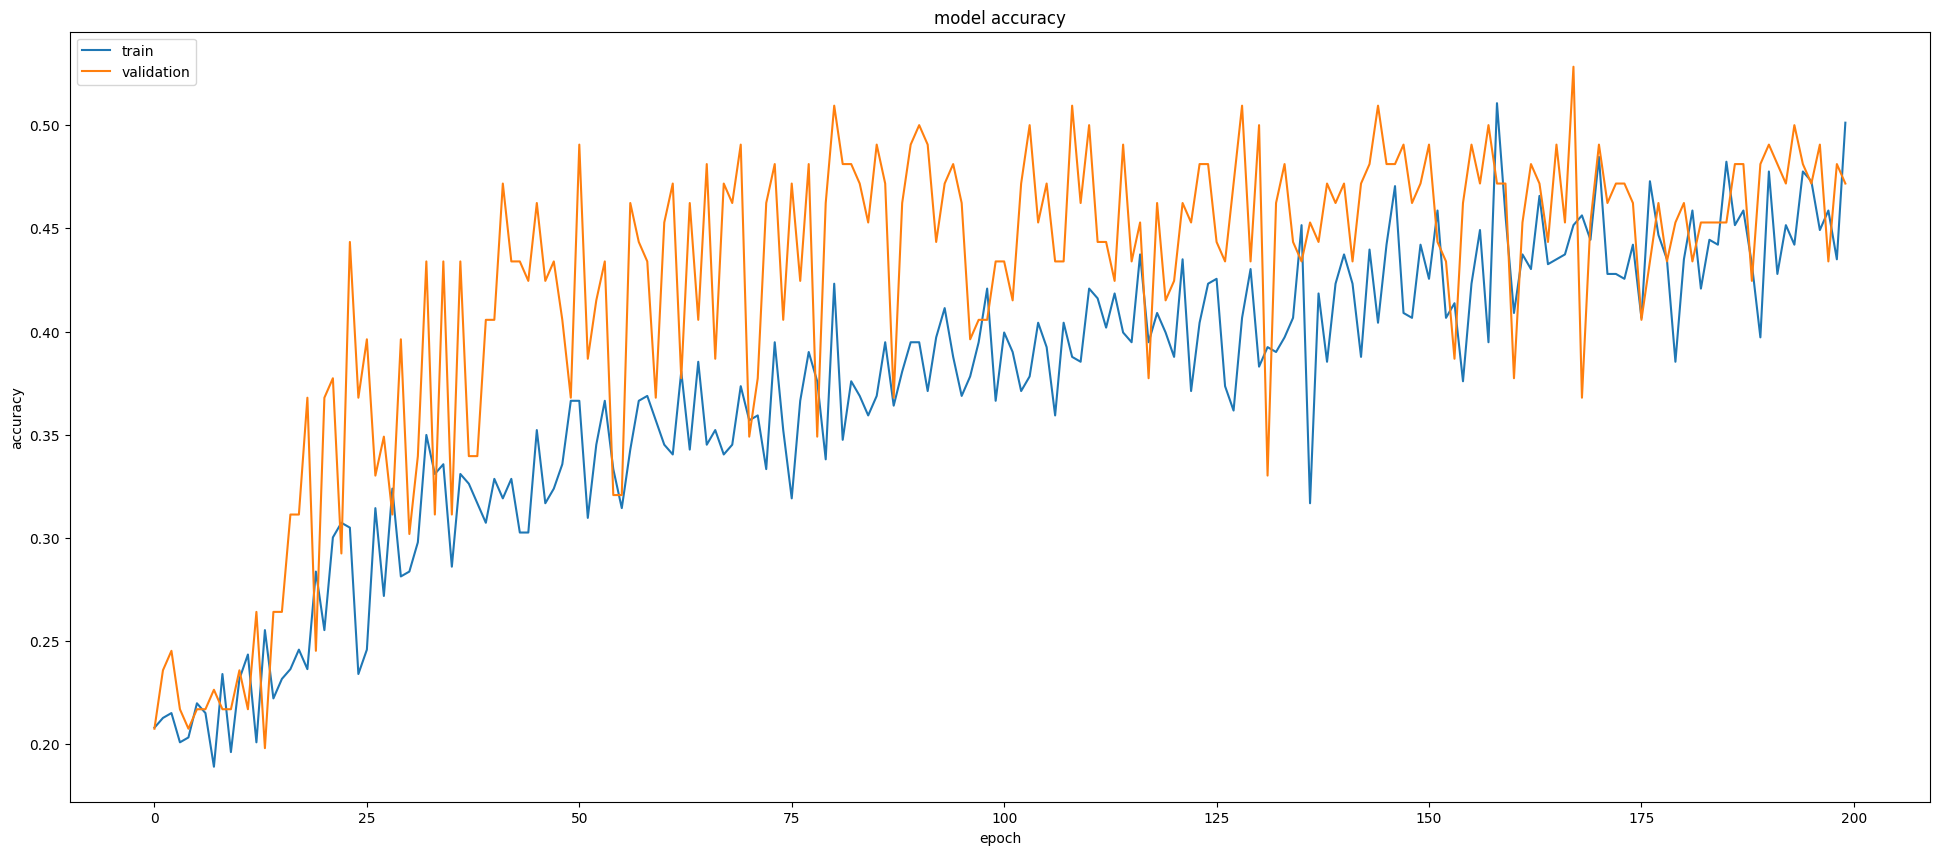

In [31]:
plt.figure(figsize=(24,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

plt.show()

In [32]:
# Predicting
y_pred = model.predict(X_test)

# Evaluating the model
score = model.evaluate(X_test, Y_test)  # Pass X_test and Y_test separately
print('Accuracy over the test set: \n', round(score[1]*100, 2), '%')



2/2 [==============================] - 0s 24ms/step - loss: 2.0897 - accuracy: 0.5593
Accuracy over the test set: 
 55.93 %


In [33]:
print('Loss over the test set: ', round(score[0],2))

Loss over the test set:  2.09


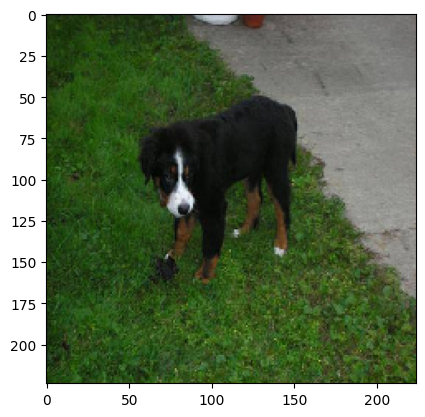

Originally entlebucher
Predicted entlebucher


In [35]:
#plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

#Finding max value from predition list and comaparing original value vs predi

print("Originally", labels['breed'] [np.argmax(Y_test[1])])

print("Predicted", labels['breed'][np.argmax(y_pred[1])])

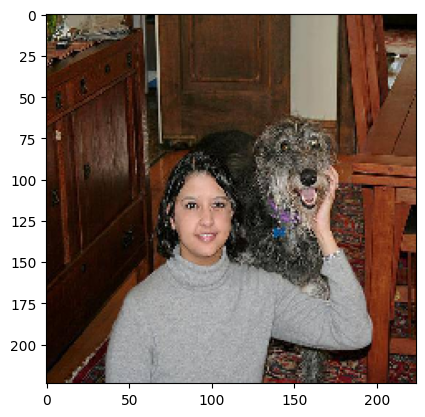

Originally scottish_deerhound
Predicted entlebucher


In [40]:
#plotting image to compare
plt.imshow(X_test[5,:,:,:])
plt.show()

#Finding max value from predition list and comaparing original value vs predi

print("Originally", labels['breed'] [np.argmax(Y_test[5])])

print("Predicted", labels['breed'][np.argmax(y_pred[5])])

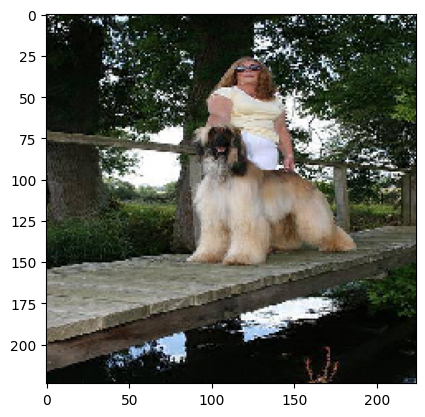

Originally scottish_deerhound
Predicted scottish_deerhound


In [41]:
#plotting image to compare
plt.imshow(X_test[50,:,:,:])
plt.show()

#Finding max value from predition list and comaparing original value vs predi

print("Originally", labels['breed'] [np.argmax(Y_test[50])])

print("Predicted", labels['breed'][np.argmax(y_pred[50])])

In [42]:
model.save('dogs_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
